In [1]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
%matplotlib inline

Triangular lattice
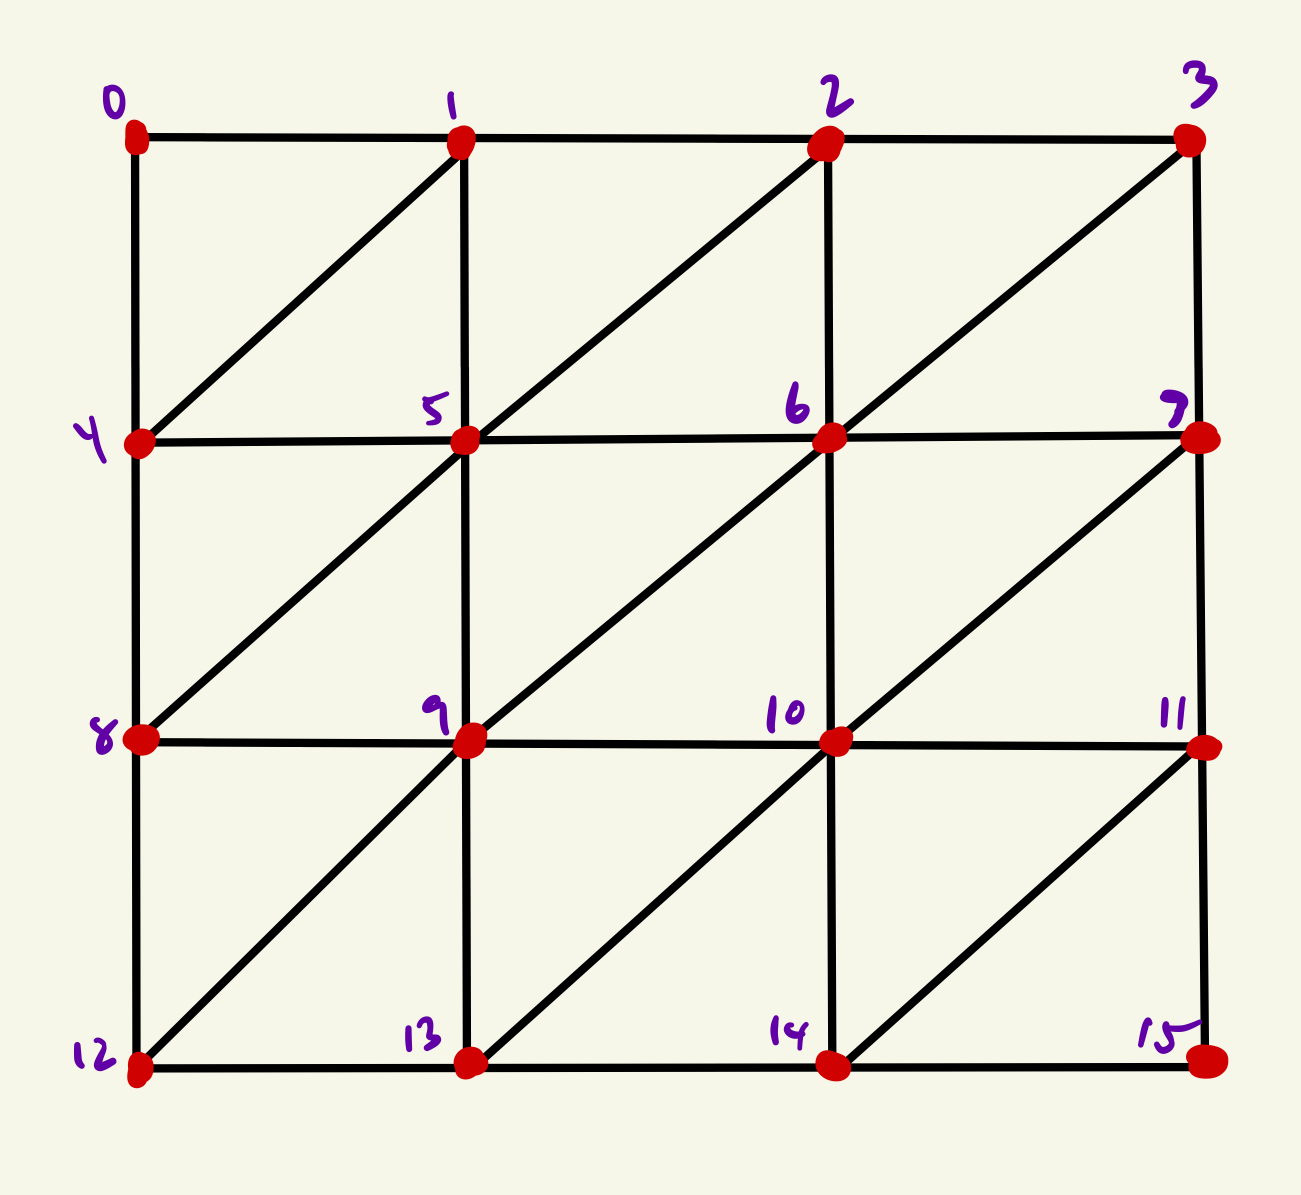

In [2]:
#J>0
J1 ={
    (0,1):1.0, (0,4):1.0,
    (1,0):1.0, (1,4):1.0, (1,5):1.0, (1,2):1.0, 
    (2,1):1.0, (2,5):1.0, (2,6):1.0, (2,3):1.0, 
    (3,2):1.0, (3,6):1.0, (3,7):1.0, 
 
    (4,0):1.0, (4,1):1.0, (4,5):1.0, (4,8):1.0,
    (5,4):1.0, (5,1):1.0, (5,2):1.0, (5,6):1.0, (5,9):1.0, (5,8):1.0, 
    (6,5):1.0, (6,2):1.0, (6,3):1.0, (6,7):1.0, (6,10):1.0, (6,9):1.0,
    (7,6):1.0, (7,3):1.0, (7,11):1.0, (7,10):1.0,
    
    (8,4):1.0, (8,5):1.0, (8,9):1.0, (8,12):1.0, 
    (9,8):1.0, (9,5):1.0, (9,6):1.0, (9,10):1.0, (9,13):1.0, (9,12):1.0,
    (10,9):1.0, (10,6):1.0, (10,7):1.0, (10,11):1.0, (10,14):1.0, (10,13):1.0,
    (11,10):1.0, (11,7):1.0, (11,15):1.0, (11,14):1.0,
      
    (12,8):1.0, (12,9):1.0, (12,13):1.0, 
    (13,12):1.0, (13,9):1.0, (13,10):1.0, (13,14):1.0, 
    (14,13):1.0, (14,10):1.0, (14,11):1.0, (14,15):1.0, 
    (15,14):1.0, (15,11):1.0
}

h1 ={
    0:0.0, 1:0.0, 2:0.0, 3:0.0, 
    4:0.0, 5:0.0, 6:0.0, 7:0.0, 
    8:0.0, 9:0.0, 10:0.0, 11:0.0, 
    12:0.0, 13:0.0, 14:0.0, 15:0.0, 
}
model1 = dimod.BinaryQuadraticModel(h1, J1, 0.0, dimod.SPIN)

In [3]:
sampler = dimod.SimulatedAnnealingSampler()
response1 = sampler.sample(model1, num_reads=50)
print(response1)

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 energy num_oc.
0  +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -30.0       1
2  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -30.0       1
9  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -30.0       1
27 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -30.0       1
33 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -30.0       1
35 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -30.0       1
36 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -30.0       1
42 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -30.0       1
1  +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1  -26.0       1
3  +1 -1 +1 -1 +1 -1 -1 +1 -1 +1 -1 -1 +1 -1 +1 -1  -26.0       1
4  +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1  -26.0       1
5  +1 -1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 +1 -1  -26.0       1
6  -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1  -26.0       1
8  +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 -1 +1  -26.0       1
10 +1 +1 -

Ferromagnetic (J<0) Ground state calculation
$$
E=\sum_{<ij>} J_{ij} = -66
$$

In [4]:
#J<0 FM

J2 ={
    (0,1):-1.0, (0,4):-1.0,
    (1,0):-1.0, (1,4):-1.0, (1,5):-1.0, (1,2):-1.0, 
    (2,1):-1.0, (2,5):-1.0, (2,6):-1.0, (2,3):-1.0, 
    (3,2):-1.0, (3,6):-1.0, (3,7):-1.0, 
 
    (4,0):-1.0, (4,1):-1.0, (4,5):-1.0, (4,8):-1.0,
    (5,4):-1.0, (5,1):-1.0, (5,2):-1.0, (5,6):-1.0, (5,9):-1.0, (5,8):-1.0, 
    (6,5):-1.0, (6,2):-1.0, (6,3):-1.0, (6,7):-1.0, (6,10):-1.0, (6,9):-1.0,
    (7,6):-1.0, (7,3):-1.0, (7,11):-1.0, (7,10):-1.0,
    
    (8,4):-1.0, (8,5):-1.0, (8,9):-1.0, (8,12):-1.0, 
    (9,8):-1.0, (9,5):-1.0, (9,6):-1.0, (9,10):-1.0, (9,13):-1.0, (9,12):-1.0,
    (10,9):-1.0, (10,6):-1.0, (10,7):-1.0, (10,11):-1.0, (10,14):-1.0, (10,13):-1.0,
    (11,10):-1.0, (11,7):-1.0, (11,15):-1.0, (11,14):-1.0,
      
    (12,8):-1.0, (12,9):-1.0, (12,13):-1.0, 
    (13,12):-1.0, (13,9):-1.0, (13,10):-1.0, (13,14):-1.0, 
    (14,13):-1.0, (14,10):-1.0, (14,11):-1.0, (14,15):-1.0, 
    (15,14):-1.0, (15,11):-1.0
}

h2 ={
    0:0.0, 1:0.0, 2:0.0, 3:0.0, 
    4:0.0, 5:0.0, 6:0.0, 7:0.0, 
    8:0.0, 9:0.0, 10:0.0, 11:0.0, 
    12:0.0, 13:0.0, 14:0.0, 15:0.0, 
}
model2 = dimod.BinaryQuadraticModel(h2, J2, 0.0, dimod.SPIN)

In [5]:
sampler = dimod.SimulatedAnnealingSampler()
response2 = sampler.sample(model2, num_reads=20)
print(response2)

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 energy num_oc.
0  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -66.0       1
1  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
2  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -66.0       1
3  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -66.0       1
4  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -66.0       1
5  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
6  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
7  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
8  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
9  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -66.0       1
10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
13 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -66.0       1
14 +1 +1 +

FM case without diagonal bonds

In [6]:
#J<0, no diagonal bonds
J3 ={
    (0,1):-1.0, (0,4):-1.0,
    (1,0):-1.0, (1,4):0.0, (1,5):-1.0, (1,2):-1.0, 
    (2,1):-1.0, (2,5):0.0, (2,6):-1.0, (2,3):-1.0, 
    (3,2):-1.0, (3,6):0.0, (3,7):-1.0, 
 
    (4,0):-1.0, (4,1):0.0, (4,5):-1.0, (4,8):-1.0,
    (5,4):-1.0, (5,1):-1.0, (5,2):0.0, (5,6):-1.0, (5,9):-1.0, (5,8):0.0, 
    (6,5):-1.0, (6,2):-1.0, (6,3):0.0, (6,7):-1.0, (6,10):-1.0, (6,9):0.0,
    (7,6):-1.0, (7,3):-1.0, (7,11):-1.0, (7,10):0.0,
    
    (8,4):-1.0, (8,5):0.0, (8,9):-1.0, (8,12):-1.0, 
    (9,8):-1.0, (9,5):-1.0, (9,6):0.0, (9,10):-1.0, (9,13):-1.0, (9,12):0.0,
    (10,9):-1.0, (10,6):-1.0, (10,7):0.0, (10,11):-1.0, (10,14):-1.0, (10,13):0.0,
    (11,10):-1.0, (11,7):-1.0, (11,15):-1.0, (11,14):0.0,
      
    (12,8):-1.0, (12,9):0.0, (12,13):-1.0, 
    (13,12):-1.0, (13,9):-1.0, (13,10):0.0, (13,14):-1.0, 
    (14,13):-1.0, (14,10):-1.0, (14,11):0.0, (14,15):-1.0, 
    (15,14):-1.0, (15,11):-1.0
}

h3 ={
    0:0.0, 1:0.0, 2:0.0, 3:0.0, 
    4:0.0, 5:0.0, 6:0.0, 7:0.0, 
    8:0.0, 9:0.0, 10:0.0, 11:0.0, 
    12:0.0, 13:0.0, 14:0.0, 15:0.0, 
}
model3 = dimod.BinaryQuadraticModel(h3, J3, 0.0, dimod.SPIN)

In [7]:
sampler = dimod.SimulatedAnnealingSampler()
response3 = sampler.sample(model3, num_reads=20)
print(response3)

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 energy num_oc.
0  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
1  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -48.0       1
2  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
3  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -48.0       1
4  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
5  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
6  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
7  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -48.0       1
8  +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -48.0       1
9  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  -48.0       1
13 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1 +1  -48.0       1
14 +1 +1 +

AFM case without diagonal bonds

In [8]:
#J>0, no diagonal bonds
J4 ={
    (0,1):1.0, (0,4):1.0,
    (1,0):1.0, (1,4):0.0, (1,5):1.0, (1,2):1.0, 
    (2,1):1.0, (2,5):0.0, (2,6):1.0, (2,3):1.0, 
    (3,2):1.0, (3,6):0.0, (3,7):1.0, 
 
    (4,0):1.0, (4,1):0.0, (4,5):1.0, (4,8):1.0,
    (5,4):1.0, (5,1):1.0, (5,2):0.0, (5,6):1.0, (5,9):1.0, (5,8):0.0, 
    (6,5):1.0, (6,2):1.0, (6,3):0.0, (6,7):1.0, (6,10):1.0, (6,9):0.0,
    (7,6):1.0, (7,3):1.0, (7,11):1.0, (7,10):0.0,
    
    (8,4):1.0, (8,5):0.0, (8,9):1.0, (8,12):1.0, 
    (9,8):1.0, (9,5):1.0, (9,6):0.0, (9,10):1.0, (9,13):1.0, (9,12):0.0,
    (10,9):1.0, (10,6):1.0, (10,7):0.0, (10,11):1.0, (10,14):1.0, (10,13):0.0,
    (11,10):1.0, (11,7):1.0, (11,15):1.0, (11,14):0.0,
      
    (12,8):1.0, (12,9):0.0, (12,13):1.0, 
    (13,12):1.0, (13,9):1.0, (13,10):0.0, (13,14):1.0, 
    (14,13):1.0, (14,10):1.0, (14,11):0.0, (14,15):1.0, 
    (15,14):1.0, (15,11):1.0
}

h4 ={
    0:0.0, 1:0.0, 2:0.0, 3:0.0, 
    4:0.0, 5:0.0, 6:0.0, 7:0.0, 
    8:0.0, 9:0.0, 10:0.0, 11:0.0, 
    12:0.0, 13:0.0, 14:0.0, 15:0.0, 
}
model4 = dimod.BinaryQuadraticModel(h4, J4, 0.0, dimod.SPIN)

In [13]:
sampler = dimod.SimulatedAnnealingSampler()
response4 = sampler.sample(model4, num_reads=20)
print(response4)

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 energy num_oc.
0  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
1  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
2  +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
3  +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
4  +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
5  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
6  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
7  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
8  -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
9  +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
10 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
11 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
12 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1  -48.0       1
13 +1 -1 +1 -1 -1 +1 -1 +1 +1 -1 +1 -1 -1 +1 -1 +1  -48.0       1
14 -1 +1 -